In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [67]:
# Read CSV file 

data = pd.read_csv(r"C:\Users\patel\OneDrive\Desktop\cricket_data.csv")
data.head()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0


In [68]:
# Selecting the 'Batting_Strike_Rate' column
column = data['Batting_Strike_Rate']

In [69]:
# Convert the column to numeric, coercing errors to NaN
data['Batting_Strike_Rate'] = pd.to_numeric(data['Batting_Strike_Rate'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['Batting_Strike_Rate'], inplace=True)

# Now you can proceed with calculating mean, median, mode, and standard deviation
mean = data['Batting_Strike_Rate'].mean()
median = data['Batting_Strike_Rate'].median()
mode = data['Batting_Strike_Rate'].mode()[0]
std_dev = data['Batting_Strike_Rate'].std()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")


Mean: 102.22452696728558
Median: 118.9
Mode: 0.0
Standard Deviation: 59.23685689723631


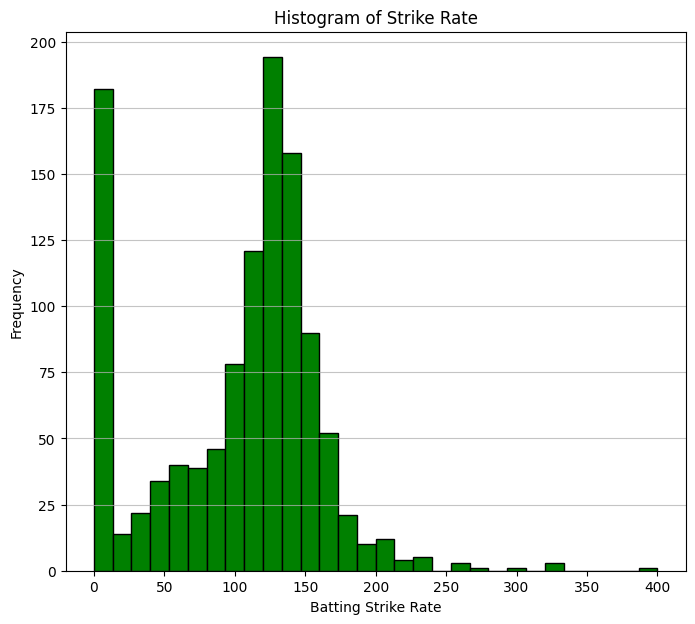

In [70]:
plt.figure(figsize=(8, 7))
plt.hist(data['Batting_Strike_Rate'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Strike Rate')
plt.xlabel('Batting Strike Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

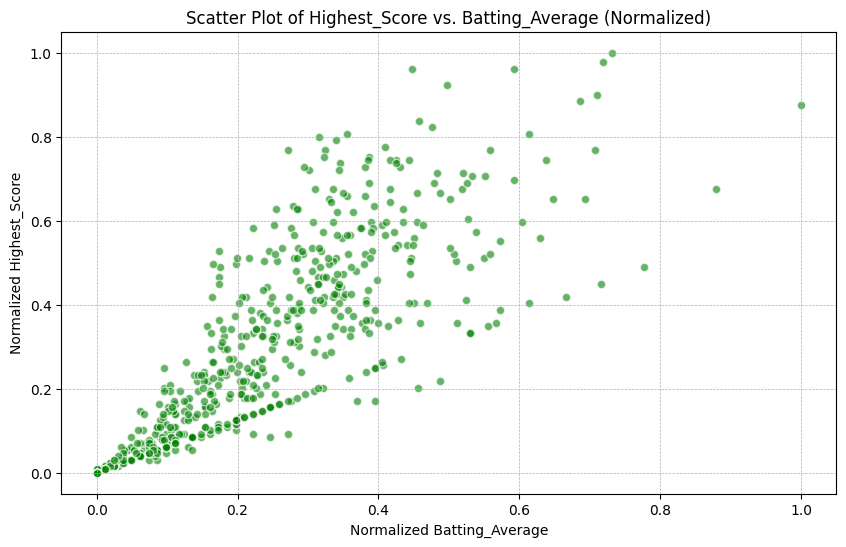

In [71]:
# Convert 'Batting_Average' and 'Highest_Score' to numeric data types
data['Batting_Average'] = pd.to_numeric(data['Batting_Average'], errors='coerce')
data['Highest_Score'] = pd.to_numeric(data['Highest_Score'], errors='coerce')

# Drop rows with NaN values in 'Batting_Average' and 'Highest_Score'
data = data.dropna(subset=['Batting_Average', 'Highest_Score'])

# Normalize the data
normalized_batting_average = (data['Batting_Average'] - data['Batting_Average'].min()) / (data['Batting_Average'].max() - data['Batting_Average'].min())
normalized_highest_score = (data['Highest_Score'] - data['Highest_Score'].min()) / (data['Highest_Score'].max() - data['Highest_Score'].min())

plt.figure(figsize=(10, 6))
plt.scatter(normalized_batting_average, normalized_highest_score, alpha=0.6, edgecolors='w', color='green')
plt.title('Scatter Plot of Highest_Score vs. Batting_Average (Normalized)')
plt.xlabel('Normalized Batting_Average')
plt.ylabel('Normalized Highest_Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

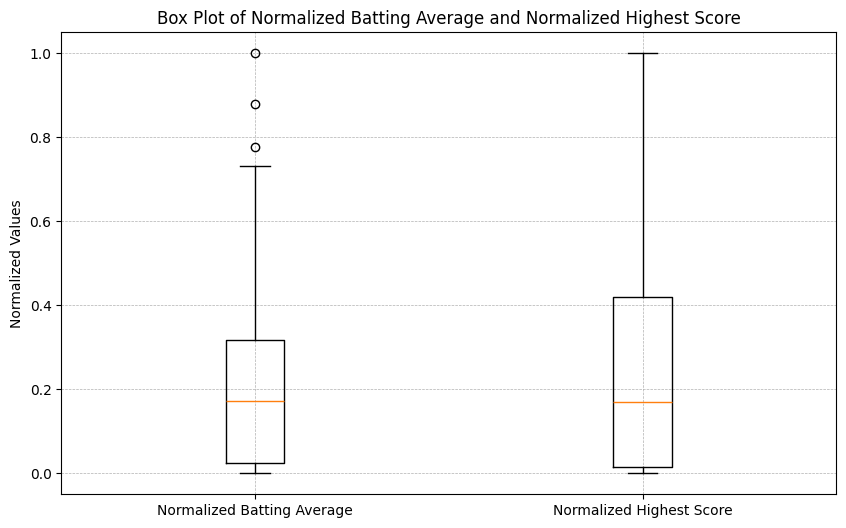

In [72]:
# Assuming you have the data already loaded and processed

# Create a list containing the normalized data for box plot
normalized_data = [normalized_batting_average, normalized_highest_score]

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(normalized_data, labels=['Normalized Batting Average', 'Normalized Highest Score'])
plt.title('Box Plot of Normalized Batting Average and Normalized Highest Score')
plt.ylabel('Normalized Values')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [73]:
# Preparing the data
X = data[['Batting_Average']]  
y = data['Highest_Score'] 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression

# Creating a linear regression model
model = LinearRegression()
# Splitting the dataset into training and testing sets


In [76]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Making predictions
y_pred = model.predict(X_test)

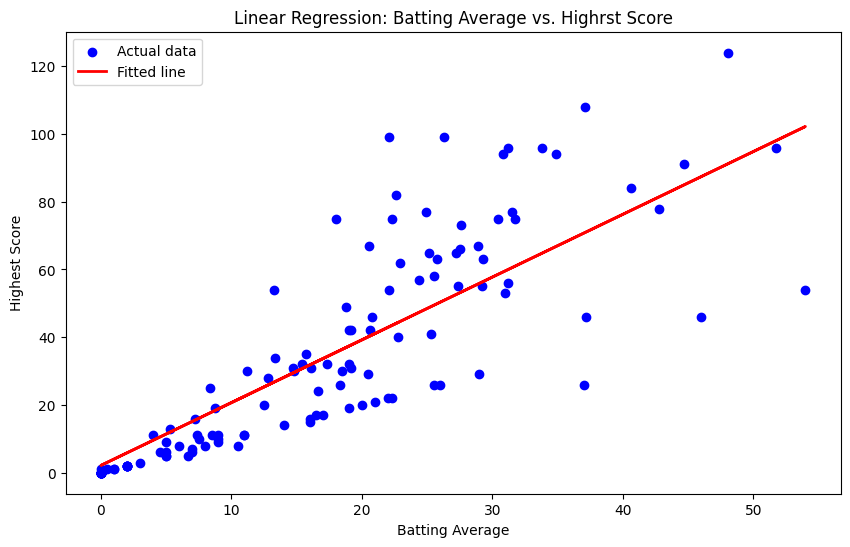

In [78]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Batting_Average'], y_test, color='blue', label='Actual data')  
plt.plot(X_test['Batting_Average'], y_pred, color='red', linewidth=2, label='Fitted line') 
plt.title('Linear Regression: Batting Average vs. Highrst Score')
plt.xlabel('Batting Average')
plt.ylabel('Highest Score')
plt.legend()
plt.show()

In [79]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 10.682727586083058
Mean Squared Error (MSE): 251.60824489974664
Root Mean Squared Error (RMSE): 15.862163941270644
R-squared: 0.7399808463098754
